In [1]:
%matplotlib inline

In [2]:
import json
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
json_filename = "static/plotdata.json"
data = json.load(open(json_filename))

In [4]:
df = pd.DataFrame(data=data)

def get_subdataframe_for_sep_snr(sep, snr):
    # Boolean array com true nas posições com separation igual a `sep`
    sep_idx = np.isclose(df.sep, sep)
    # # Boolean array com true nas posições com SNR igual a `snr`
    snr_idx = np.isclose(df.snr, snr)
    # Multiplicando os dois boolean arrays equivale a operação lógica AND elemento a elemento
    return df[sep_idx * snr_idx]

In [5]:
def plot_and_save_to_file(spectra_type):
    """
    spectra_type can be mvdr, music, or fourier.
    snr can be either 0, 10, or 20.
    """
    
    seps = [2, 1, 0.5, 0.1]
    snrs = [10, 20]
    
    fig, ax = plt.subplots(4, figsize=(12, 1.8*len(seps)))
    
    for idx, sep in enumerate(seps):
        df_aux_snr_20 = get_subdataframe_for_sep_snr(sep, 20)
        df_aux_snr_10 = get_subdataframe_for_sep_snr(sep, 10)
        ax[idx].plot(df_aux_snr_20.angle, df_aux_snr_20[spectra_type])
        ax[idx].hold(True)
        ax[idx].plot(df_aux_snr_10.angle, df_aux_snr_10[spectra_type])
        ax[idx].legend(["20dB", "10dB"])
        ax[idx].set_title("Spatial Separation: {0}$\mu_B$".format(sep))
        
    ax[-1].set_xlabel("Spatial Separation (normalized by standard beamwidth)")
    fig.tight_layout()
    fig.savefig("{0}.png".format(spectra_type))

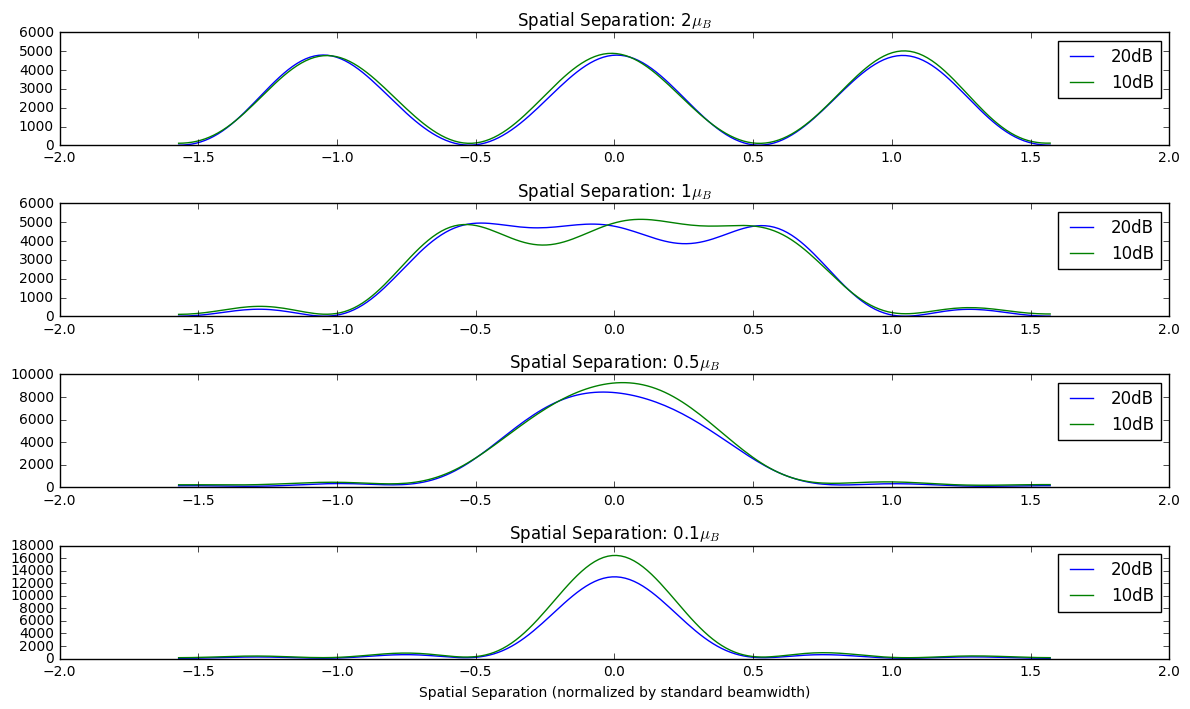

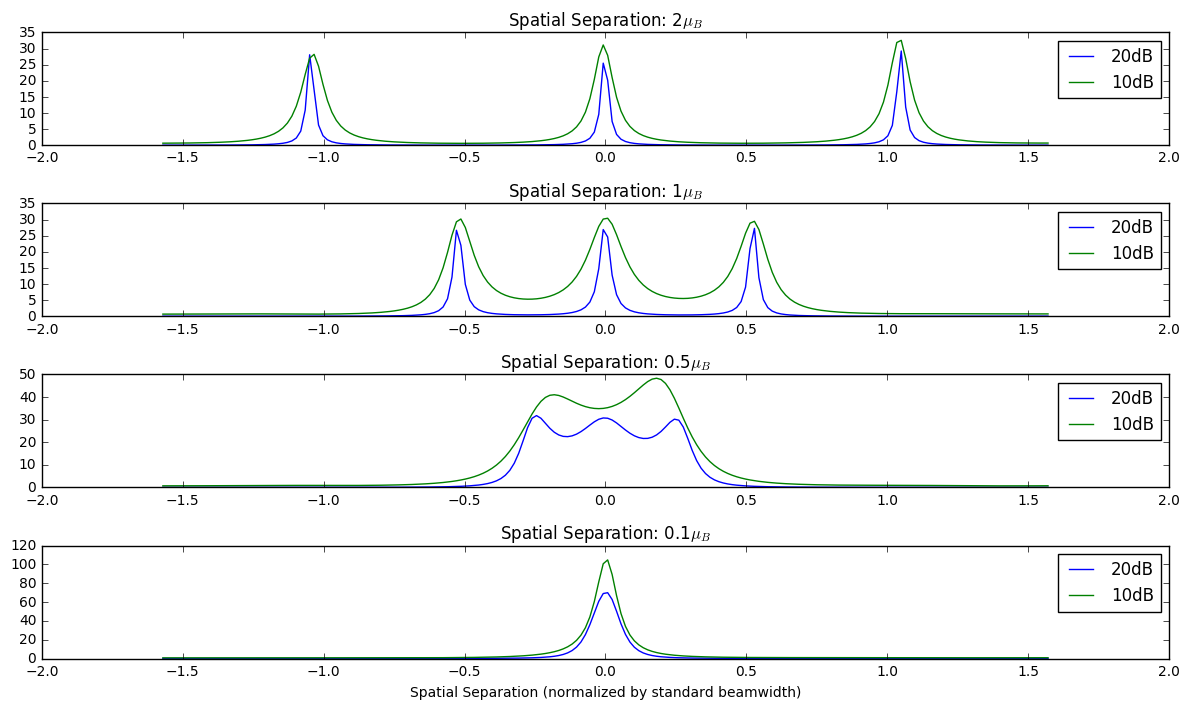

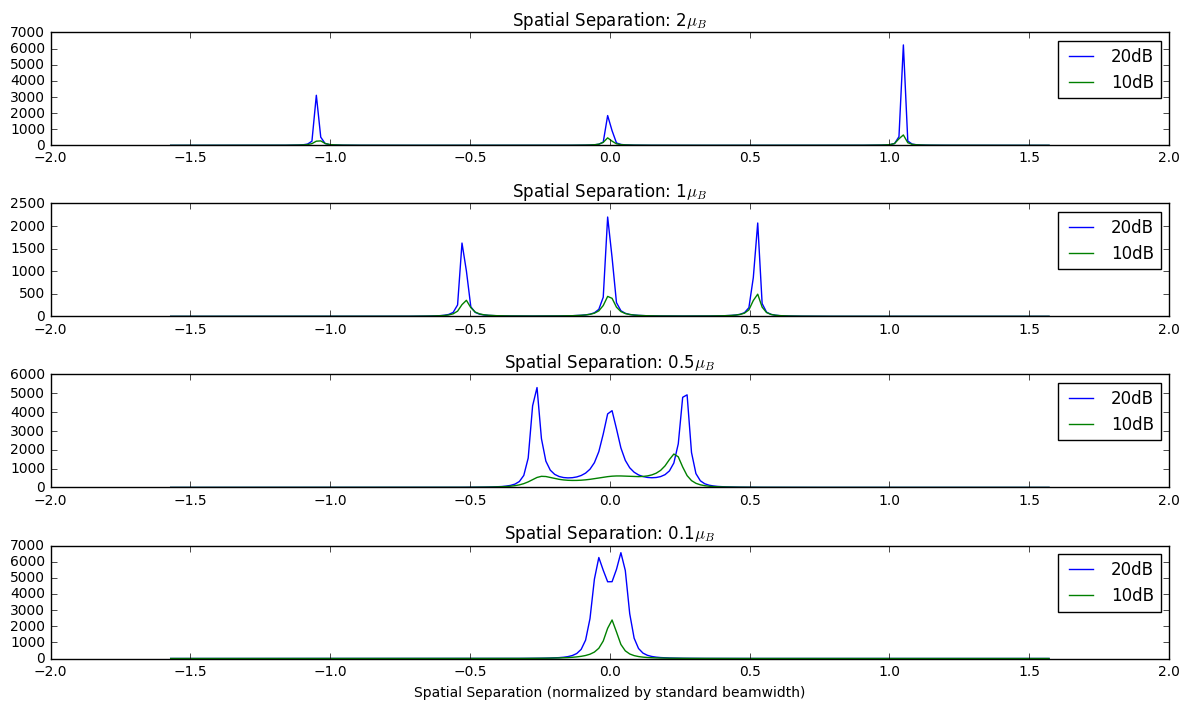

In [6]:
# Plot and save to file
plot_and_save_to_file("fourier")
plot_and_save_to_file("mvdr")
plot_and_save_to_file("music")